In [78]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statistics
from scipy.stats import norm

In [79]:
glaxo_dataset = pd.read_csv('./GLAXO.csv')
glaxo_dataset.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.00,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.00,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.00,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.00,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.00,1639.80,28035.0,459.11
5,2010-01-11,1659.00,1694.95,1601.05,1630.00,1629.45,10566.0,173.40
6,2010-01-12,1630.00,1635.00,1578.00,1592.00,1583.85,47274.0,756.75
7,2010-01-13,1592.00,1605.90,1566.00,1568.00,1571.30,20709.0,327.53
8,2010-01-14,1580.00,1595.00,1562.40,1572.20,1573.55,13453.0,212.09
9,2010-01-15,1581.10,1585.00,1565.00,1565.15,1570.40,6408.0,101.06


In [80]:
glaxo_dataset.shape

(1739, 8)

In [81]:
glaxo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High                  1739 non-null   float64
 3   Low                   1739 non-null   float64
 4   Last                  1739 non-null   float64
 5   Close                 1739 non-null   float64
 6   Total Trade Quantity  1739 non-null   float64
 7   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7), object(1)
memory usage: 108.8+ KB


In [82]:
glaxo_dataset.corr()

C:\Users\Pranjal Kumar\AppData\Local\Temp\ipykernel_9268\3127736805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  glaxo_dataset.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.997759,0.998590,0.997385,0.997798,-0.116974,-0.015627
High,0.997759,1.000000,0.997372,0.998473,0.998616,-0.109626,-0.007932
Low,0.998590,0.997372,1.000000,0.998484,0.998867,-0.118333,-0.016578
Last,0.997385,0.998473,0.998484,1.000000,0.999777,-0.115315,-0.013613
Close,0.997798,0.998616,0.998867,0.999777,1.000000,-0.114684,-0.013033
Total Trade Quantity,-0.116974,-0.109626,-0.118333,-0.115315,-0.114684,1.000000,0.980904
Turnover (Lacs),-0.015627,-0.007932,-0.016578,-0.013613,-0.013033,0.980904,1.000000


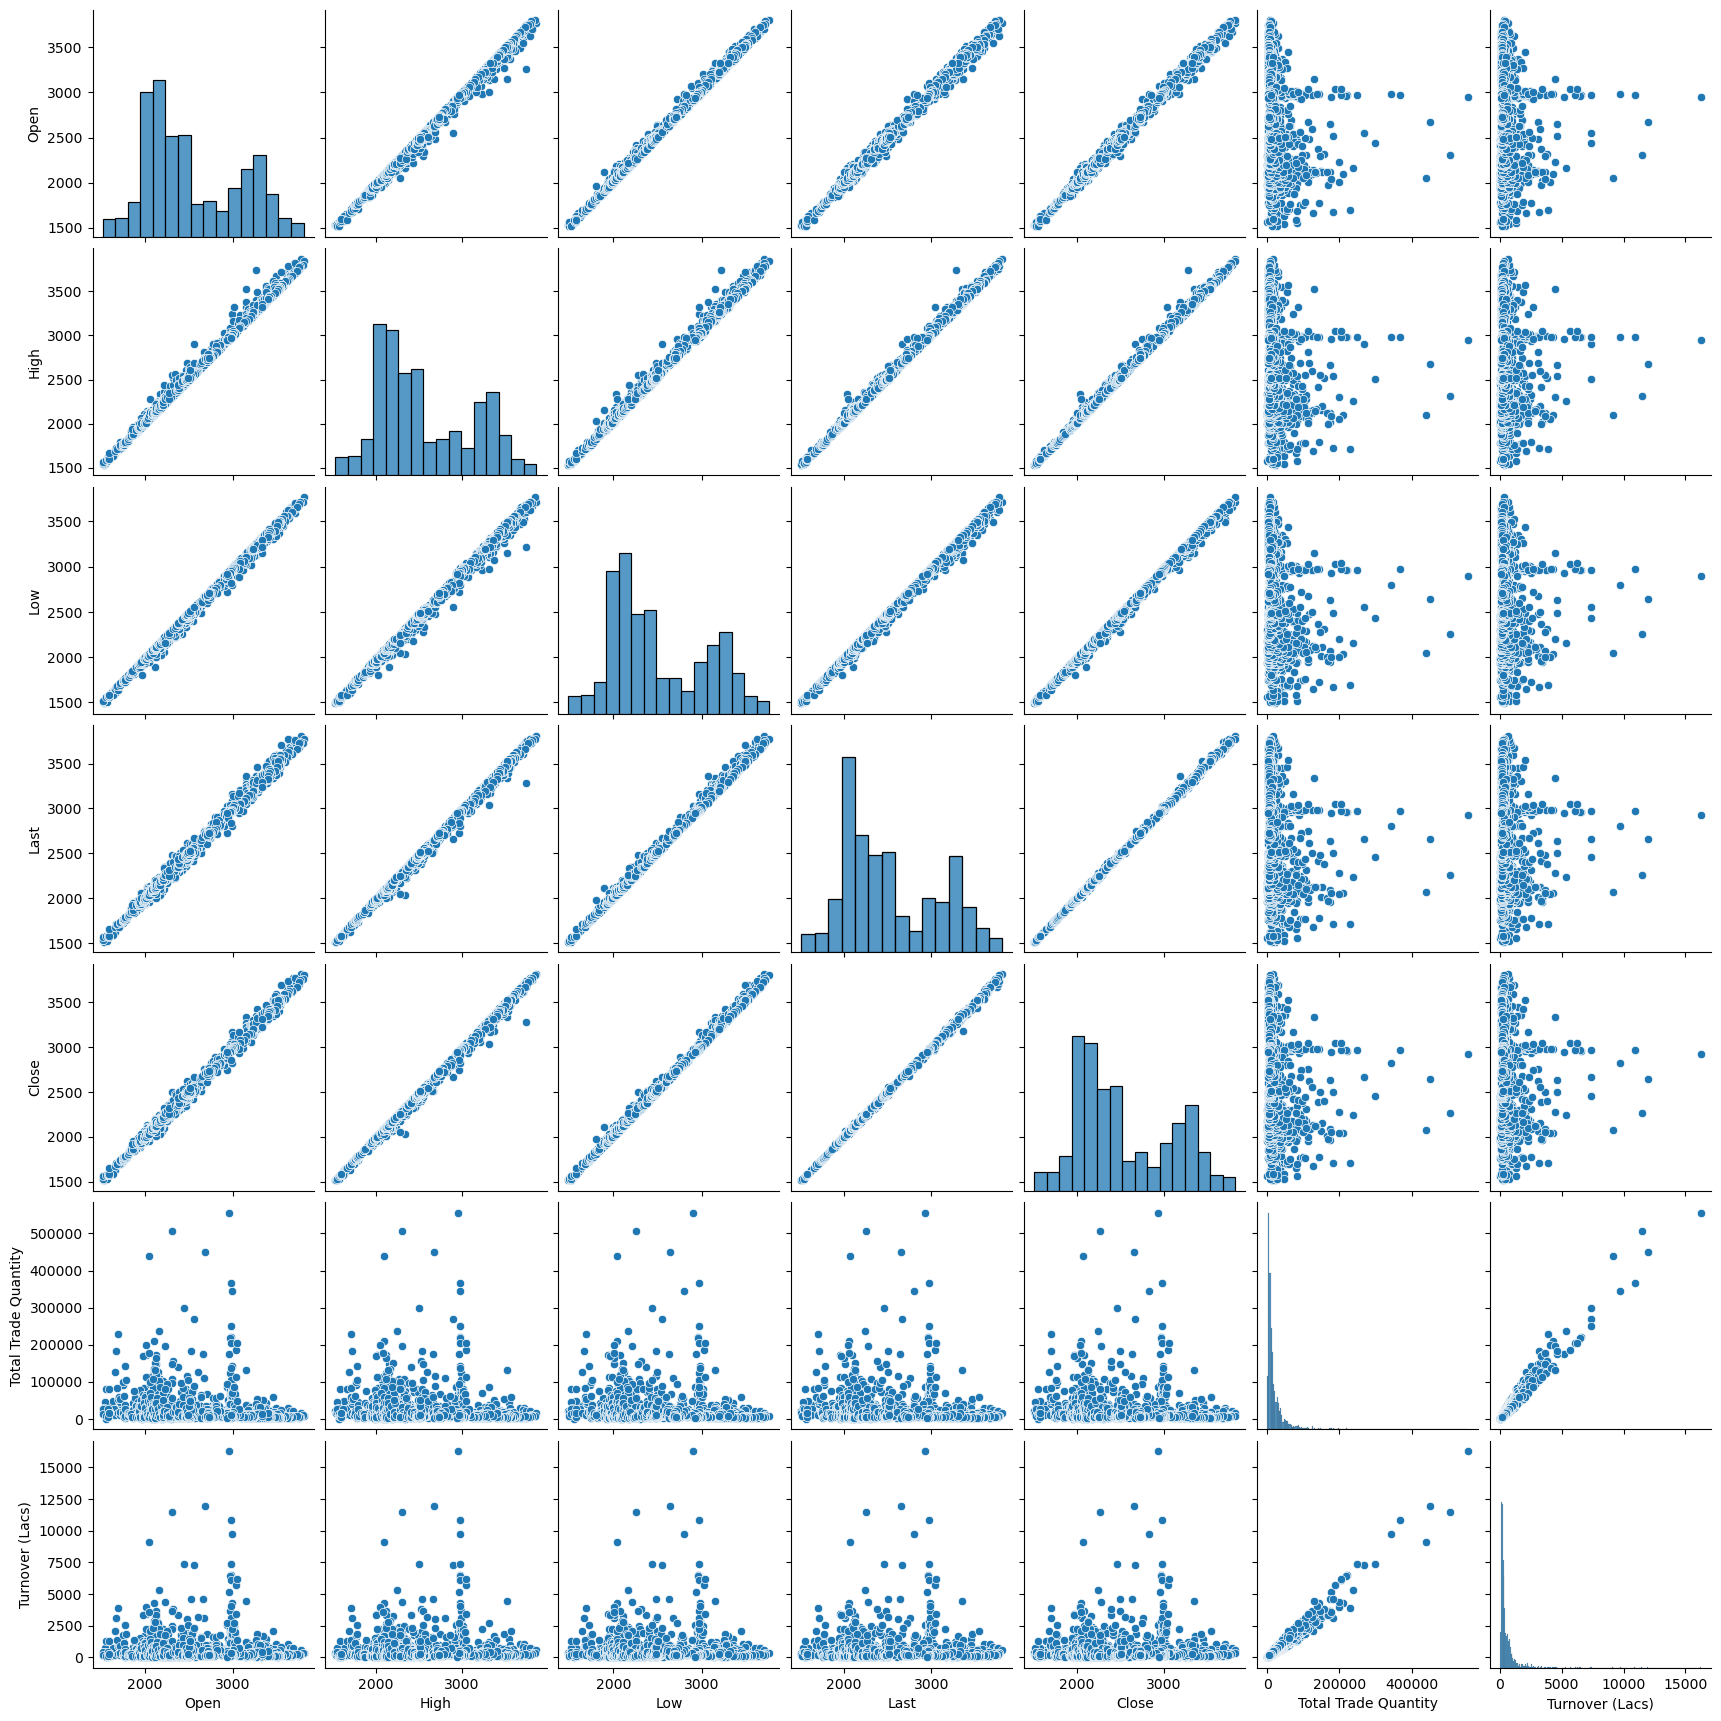

In [83]:
sns.pairplot(glaxo_dataset)

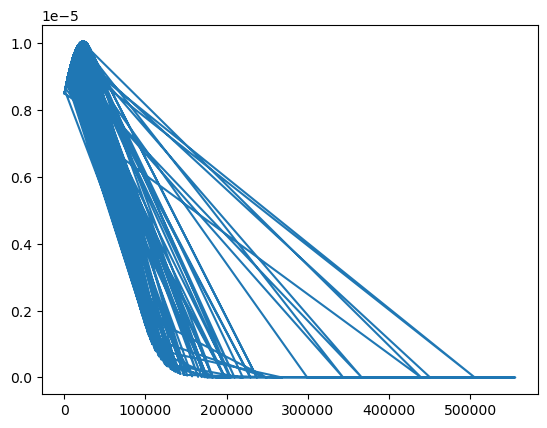

In [84]:
mean = statistics.mean(glaxo_dataset['Total Trade Quantity'])
sd = statistics.stdev(glaxo_dataset['Total Trade Quantity'])
plt.plot(glaxo_dataset['Total Trade Quantity'], norm.pdf(glaxo_dataset['Total Trade Quantity'], mean, sd))
plt.show()

In [85]:
glaxo_dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [86]:
glaxo_dataset2 = glaxo_dataset.drop('Date', axis =1)
glaxo_dataset2.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(glaxo_dataset2)
print(type(scaled_dataset))
scaled_dataset

<class 'numpy.ndarray'>


array([[-1.70154387, -1.7106344 , -1.68769103, ..., -1.67782902,
        -0.34975129, -0.41141866],
       [-1.65167614, -1.69079315, -1.67075385, ..., -1.69420067,
         0.37515027,  0.05765154],
       [-1.69229197, -1.68338698, -1.65961836, ..., -1.65405776,
         0.33412381,  0.03026487],
       ...,
       [ 0.31305694,  0.28062211,  0.34851284, ...,  0.31359248,
        -0.43323976, -0.39976264],
       [ 0.31361205,  0.31902453,  0.35216228, ...,  0.3612275 ,
        -0.39296885, -0.35549965],
       [ 0.36533016,  0.32167612,  0.3765855 , ...,  0.36474232,
        -0.42157908, -0.38560605]])

In [88]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_dataset)
    wcss.append(kmeans.inertia_)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

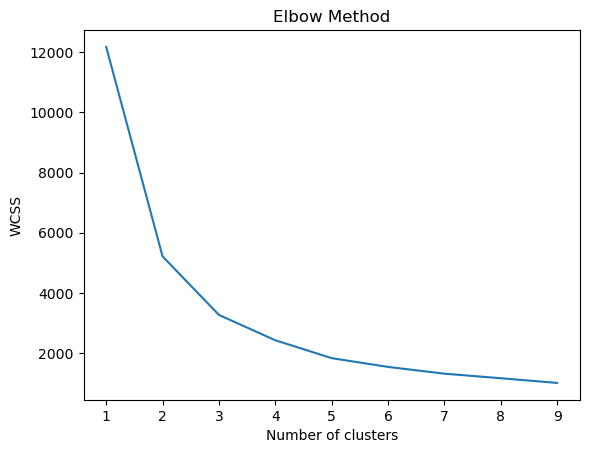

In [89]:
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
#Clustering the data
Glaxo_clusters_2 = KMeans(2, random_state=40)
Glaxo_clusters_2.fit(scaled_dataset)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=2, random_state=40)

In [91]:
Glaxo_clusters_2.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [92]:
glaxo_dataset_2 = glaxo_dataset 

In [93]:
glaxo_dataset_2['new_cluster_id2'] = Glaxo_clusters_2.labels_

In [94]:
glaxo_dataset.iloc[40:50]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),new_cluster_id2
40,2010-03-03,1692.00,1715.00,1691.00,1710.05,1710.00,229321.0,3921.39,1
41,2010-03-04,1711.25,1790.00,1705.00,1738.50,1739.55,46414.0,814.47,1
42,2010-03-05,1745.20,1769.85,1735.00,1749.70,1741.80,9152.0,160.15,1
43,2010-03-08,1782.00,1785.00,1742.25,1770.00,1772.55,24803.0,439.30,1
44,2010-03-09,1760.00,1782.00,1738.05,1753.25,1750.95,20980.0,367.61,1
45,2010-03-10,1750.00,1770.00,1732.05,1769.90,1767.65,90203.0,1586.30,1
46,2010-03-11,1755.05,1770.00,1735.00,1754.50,1744.95,6421.0,112.23,1
47,2010-03-12,1745.05,1768.50,1715.50,1730.00,1729.40,16660.0,290.55,1
48,2010-03-15,1715.10,1744.50,1690.00,1700.00,1697.55,10190.0,173.51,1
49,2010-03-16,1690.00,1711.00,1681.05,1703.00,1696.75,53708.0,910.92,1


In [95]:
glaxo_dataset['new_cluster_id2'].unique()

array([1, 0])

In [96]:
Glaxo_clusters_3 = KMeans(3, random_state=40)
Glaxo_clusters_3.fit(scaled_dataset)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [97]:
Glaxo_clusters_3.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [98]:
glaxo_dataset_3 = glaxo_dataset

In [99]:
glaxo_dataset_3['new_cluster_id3'] = Glaxo_clusters_3.labels_

In [100]:
glaxo_dataset_3.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),new_cluster_id2,new_cluster_id3
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74,1,1
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,1,1
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,1,1
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,1,1
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,1,1


In [101]:
Glaxo_clusters_5 = KMeans(5, random_state=40)
Glaxo_clusters_5.fit(scaled_dataset)

D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Drive II\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=5, random_state=40)

In [102]:
Glaxo_clusters_3.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [103]:
glaxo_dataset_5 = glaxo_dataset

In [104]:
glaxo_dataset_5['new_cluster_id5'] = Glaxo_clusters_5.labels_

In [105]:
glaxo_dataset_5['new_cluster_id5'].unique()

array([0, 3, 4, 2, 1])

In [106]:
glaxo_dataset_3.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),new_cluster_id2,new_cluster_id3,new_cluster_id5
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74,1,1,0
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,1,1,0
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,1,1,0
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,1,1,0
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,1,1,0


<h3> Plotting the clusters <h3>

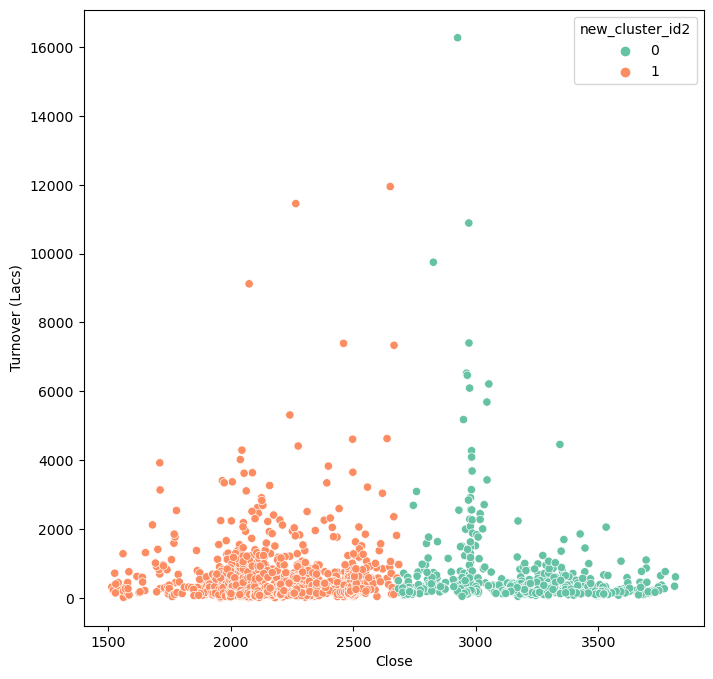

In [111]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= "Close", y = "Turnover (Lacs)", hue = 'new_cluster_id2', data = glaxo_dataset_2, palette = 'Set2')
plt.show()

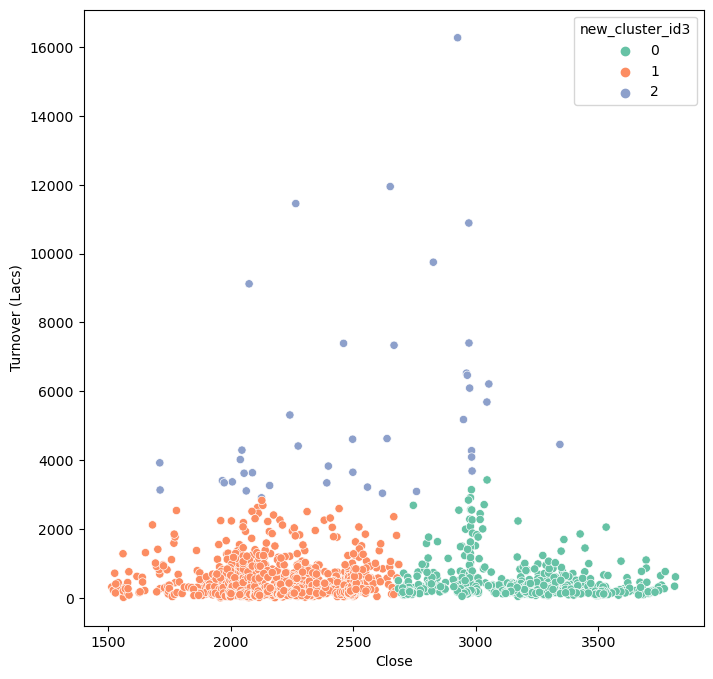

In [108]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= "Close", y = "Turnover (Lacs)", hue = 'new_cluster_id3', 
                data = glaxo_dataset_3, palette = 'Set2')
plt.show()

<Axes: xlabel='Close', ylabel='Turnover (Lacs)'>

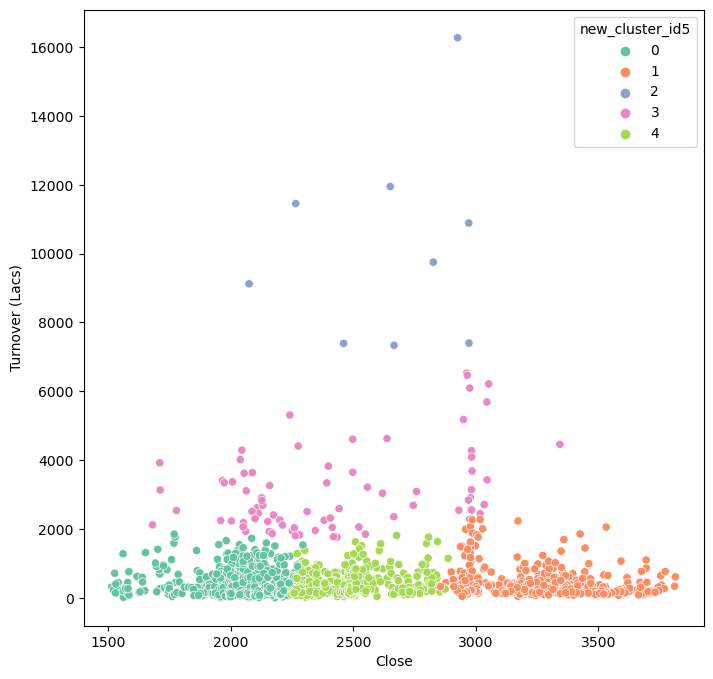

In [109]:
plt.figure(figsize=(8,8))

sns.scatterplot(x= "Close", y = "Turnover (Lacs)", hue = 'new_cluster_id5', 
                data = glaxo_dataset_5, palette = 'Set2')